# Ejercicio prueba 1


Sea el polinomio
 $$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
(siendo $d_0, d_1, \ldots, d_7$ los dígitos ordenados de su DNI, pasaporte o tarjeta de residente). Calcula la raíz real de dicho polinomio en el intervalo $x\in[-2,0]$, con una precisión de 10 cifras decimales, una tolerancia de $10^{-7}$ y un número máximo de 100 iteraciones. Usa los siguientes métodos:

i) Método de Newton-Raphson (léase previamente el método de Whittaker).

ii) Método de Regula-Falsi (combinación del método de la bisección y el de la secante):
https://es.wikipedia.org/wiki/M%C3%A9todo_de_la_regla_falsa
http://www.ugr.es/~anpalom/practica3.html#:~:text=El%20m%C3%A9todo%20de%20regula%2Dfalsi,hallada%20con%20el%20eje%20OX.

iii) Resolución numérica aproximada con nsolve$(f(x),x,x_0)$.

El fichero a entregar debe ser un notebook de python (.ipybn) con el nombre "Apellido1_Apellido2_Nombre_DNI.ipynb". Mostrar siempre por pantalla tanto la solución numérica (aunque se llegue al máximo número de interacciones) como la exacta (comando sp.solve()).


In [34]:
import numpy as np
import sympy as sp
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import sign
from decimal import *

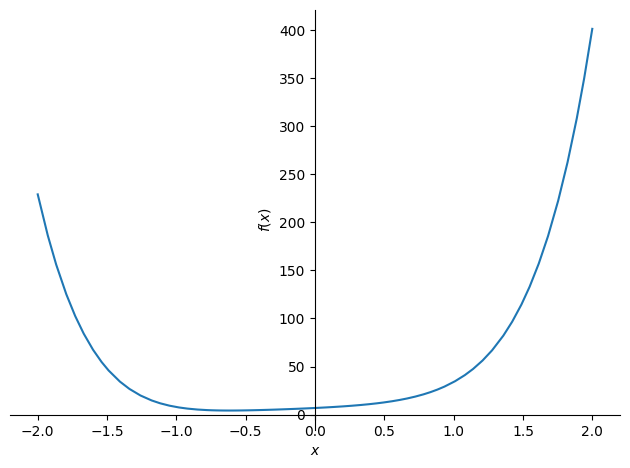

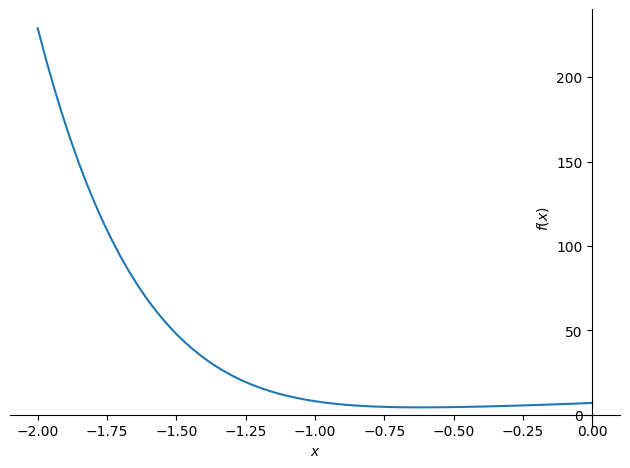

In [35]:
#Definiciones
x = sp.Symbol('x')
mp=10
getcontext().prec=mp #Precision de las operaciones en coma flotante
tolerancia=10**-7
precision=10**-10

def f(x):
  return 7+7*x+5*x**2+5*x**3+6*x**4+x**5+3*x**6

x0=-0.75
a,b=-2,2
sp.plot(f(x),(x,a,b)) #Mi polinomio no tiene raices

a,b=-2,0
sp.plot(f(x),(x,a,b))

In [36]:
#Dado que mi polinomio no tiene raices (descomentar), uso el de DNI: 65481324
#print(sp.nsolve(f(x),x,x0),"\n\n") #El polinomio no tiene raices

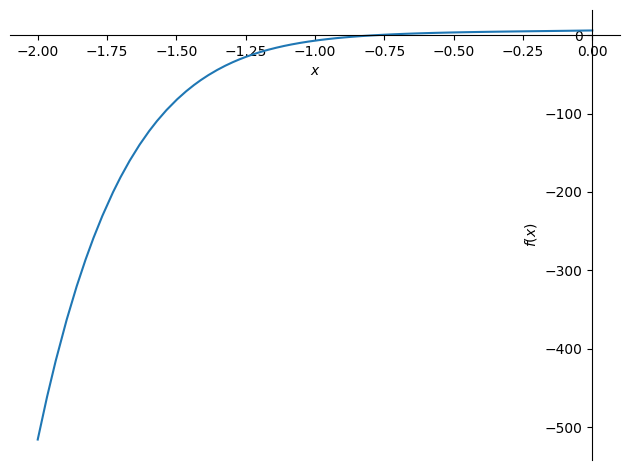

In [37]:
def g(x):
  return 6+5*x+4*x**2+8*x**3+1*x**4+3*x**5+2*x**6+4*x**7

sp.plot(g(x),(x,a,b))

###i) Método de Newton

In [38]:
def NR(f,x0,tolerancia,precision):

  """
  Metodo de Newton-Raphson para aproximar raices de funciones reales.
    f: funcion
    x0: semilla
    tolerancia: criterio de parada por proximidad de valores entre iteraciones consecutivas
    precision: umbral de proximidad de posible raiz
  """
  getcontext().prec=mp #Precision de las operaciones en coma flotante
  niter = 0; sale =''; nmax=100 #Maximo iteraciones
  iteraciones=[]

  for k in range(nmax):
      niter = niter + 1;
      x1 = x0 - f(x0)/sp.diff(f(x),x).evalf(subs={x:x0})
      iteraciones.append(x1)
      if abs(x1-x0) < tolerancia:
          sale = 'tolerancia'
          break
      if abs(f(x1)) < precision:
          sale = 'precision'
          break
      else:
          x0 = x1

  print('Sale del programa por ',sale)
  if sale == 'precision':
      print('Posiblemente solución exacta: ',x1)
  elif niter < nmax:
      print('Aproximación solicitada: ', x1)
  else:
      print('Se llegó al número máximo de iteraciones')
  print('Número total de iteraciones ', niter,'\n')

  return iteraciones

In [39]:
getcontext().prec=mp #Precision de las operaciones en coma flotante
print("Solucion exacta: ",sp.solve(g(x).evalf()),"\n")
print("Aproximacion por NR:\n\n",NR(g,x0,tolerancia,precision))

Solucion exacta:  [-0.779443349204559, -0.836714497160147 - 0.946099645735581*I, -0.836714497160147 + 0.946099645735581*I, 0.110195214083964 - 0.924302683436422*I, 0.110195214083964 + 0.924302683436422*I, 0.866240957678463 - 0.801207531645526*I, 0.866240957678463 + 0.801207531645526*I] 

Sale del programa por  tolerancia
Aproximación solicitada:  -0.779443349204559
Número total de iteraciones  4 

Aproximacion por NR:

 [-0.781168938683150, -0.779449104526941, -0.779443349268688, -0.779443349204559]


###ii) Método regula-falsi

In [40]:
def Regula_Falsi(f,a,b,tolerancia,precision):

  """
    Metodo de biseccion para aproximar raices de funciones reales.
    f: funcion
    a: extremo inferior del intervalo
    b: extremo superior del intervalo
    tolerancia: criterio de parada por proximidad de valores entre iteraciones consecutivas
    precision: umbral de proximidad de posible raiz
  """

  getcontext().prec=mp #Precision de las operaciones en coma flotante
  niter = 0; sale ='';nmax=100 #Maximo iteraciones
  iteraciones=[]

  for k in range(nmax):
      niter = niter + 1;
      c = a - (b-a)*f(a)/(f(b)-f(a))
      iteraciones.append(c)

      if abs(f(c)) < precision:
          sale = 'precision'
          break
      if np.sign(f(a)) != np.sign(f(c)):
          b = c
      else:
          a = c
      if b-a < tolerancia:
          sale = 'tolerancia'
          break

  if sale == 'precision':
      print('Posiblemente solución exacta: ',c)
  elif niter < nmax:
      print('Aproximación solicitada: ',c)
  else:
      print('Se llegó al número máximo de iteraciones')
      print('Aproximación solicitada: ',c)
  print('Número total de iteraciones ', niter,'\n')

  return iteraciones

In [41]:
getcontext().prec=mp #Precision de las operaciones en coma flotante
print("Solucion exacta: ",sp.solve(g(x).evalf()),"\n")
print("Aproximacion por Regula-Falsi:\n\n",Regula_Falsi(g,a,b,tolerancia,precision))

Solucion exacta:  [-0.779443349204559, -0.836714497160147 - 0.946099645735581*I, -0.836714497160147 + 0.946099645735581*I, 0.110195214083964 - 0.924302683436422*I, 0.110195214083964 + 0.924302683436422*I, 0.866240957678463 - 0.801207531645526*I, 0.866240957678463 + 0.801207531645526*I] 

Se llegó al número máximo de iteraciones
Aproximación solicitada:  -0.7650361012752691
Número total de iteraciones  100 

Aproximacion por Regula-Falsi:

 [-0.02298850574712641, -0.045289908445213634, -0.06694690487951749, -0.08799675939053464, -0.10847212213910629, -0.12840170491479763, -0.1478108438037704, -0.16672197108690034, -0.18515501363378095, -0.20312773125982497, -0.2206560056553344, -0.2377540883216125, -0.25443481427945547, -0.27070978702062587, -0.28658953915980145, -0.3020836724448277, -0.3172009801465363, -0.3319495543384936, -0.34633688016372344, -0.360369918848505, -0.3740551809466659, -0.3873987910690173, -0.4004065451622665, -0.4130839612425379, -0.4254363243548285, -0.43746872641687

### iii) nsolve

In [42]:
getcontext().prec=mp #Precision de las operaciones en coma flotante
print("Solucion exacta: ",sp.nsolve(g(x),x,x0),"\n")
print("Solucion exacta: ",sp.solve(g(x).evalf()))

Solucion exacta:  -0.779443349204559 

Solucion exacta:  [-0.779443349204559, -0.836714497160147 - 0.946099645735581*I, -0.836714497160147 + 0.946099645735581*I, 0.110195214083964 - 0.924302683436422*I, 0.110195214083964 + 0.924302683436422*I, 0.866240957678463 - 0.801207531645526*I, 0.866240957678463 + 0.801207531645526*I]
